<a href="https://colab.research.google.com/github/JustSomeGirlWithoutASoul/INSY662-Data-Mining-and-Visualization-Project/blob/main/Yash_main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
data = pd.read_csv('/df_imputed_final_final.csv')
#data = pd.read_csv('/Users/maggiehuang/Desktop/INSY662_Data_Mining_and_Visualization_for_Analytic/INSY662-Data-Mining-and-Visualization-Project/Fire_Incidents_Data_Imputed.csv')

<ipython-input-19-83426da82317>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


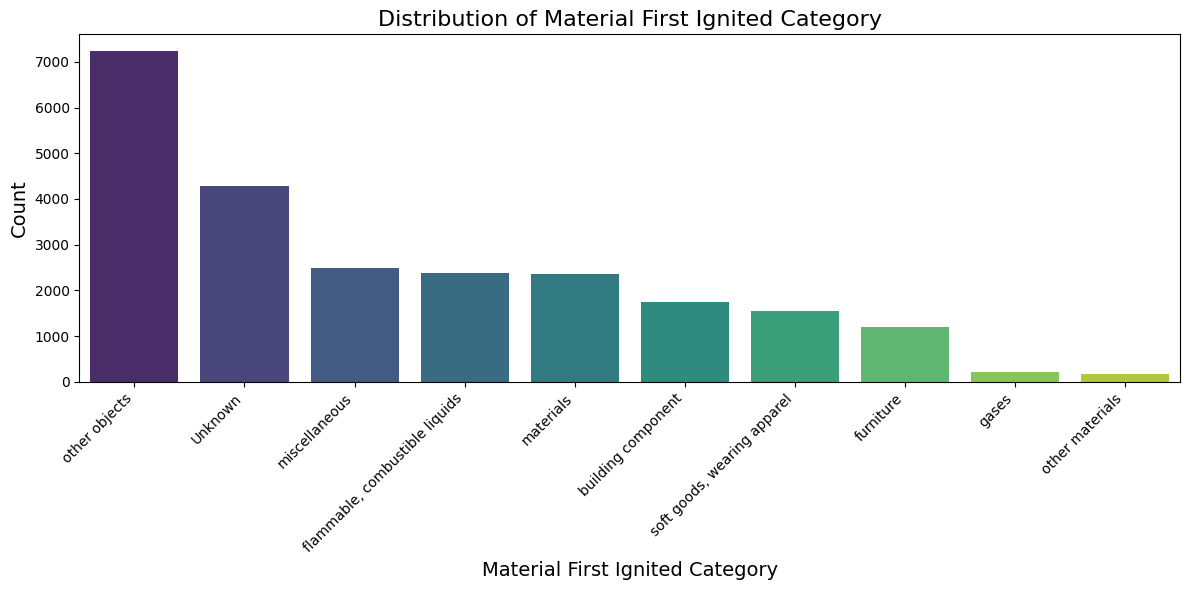

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate value counts
category_counts = data['Material_First_Ignited_Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Material First Ignited Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Material First Ignited Category', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()


# 1. Split Data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error



# Separate target variable and features
X = data.drop(columns=['Estimated_Dollar_Loss'])
y = data['Estimated_Dollar_Loss']

# # Encode categorical variables
# for column in X.select_dtypes(include=['object']).columns:
#     le = LabelEncoder()
#     X[column] = le.fit_transform(X[column].astype(str))  # Convert to string to handle any non-categorical object types



# Split data
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Dummify categorical columns using pd.get_dummies
X_dummified = pd.get_dummies(X, drop_first=True)

# Check the structure
X_dummified.info()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_dummified, y, test_size=0.3, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23641 entries, 0 to 23640
Columns: 158 entries, Number_of_responding_personnel to Possible_Cause_Category_unintentional
dtypes: bool(155), int64(3)
memory usage: 4.0 MB


# 2. Random Forest Regressor for Predicting 'Estimated_Dollar_Loss'

In [ ]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [300], #[100, 200, 300]
#     'max_depth': [50], #[20, 35, 50]
#     'min_samples_split': [3], #[3, 5, 7]
#     'min_samples_leaf': [5] #[3, 5, 7]
# }

param_grid = {
    'n_estimators': [65, 100, 200, 400],
    'max_depth': [7, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve best parameters and compute CV RMSE
best_params = grid_search.best_params_
best_cv_rmse = np.sqrt(-grid_search.best_score_)

# Get the best model from GridSearch
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_rf_model.predict(X_test)

# Calculate Test Set MSE
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)


# Calculate Normalized CV RMSE
# Here, we normalize the RMSE by the range of the target variable in the test set
normalized_rmse_range = best_cv_rmse / (y_train.max() - y_train.min())

# Calculate Normalized CV RMSE Mean
normalized_rmse_mean = best_cv_rmse / np.mean(y_train)

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation RMSE:", best_cv_rmse)
print("Test Set RMSE:", rmse)
print("Normalized CV RMSE Range:", normalized_rmse_range)
print("Normalized CV RMSE Mean:", normalized_rmse_mean)

# Store results in a dictionary
results_whole_table = {
    'Test_Set_RMSE': rmse,
    'CV_RMSE': best_cv_rmse,
    'Normalized_CV_RMSE_Range': normalized_rmse_range,
    'Normalized_CV_RMSE_Mean': normalized_rmse_mean
}

results_whole_table

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 65}
Best Cross-Validation RMSE: 124863.50200510625
Test Set RMSE: 145965.20199768068
Normalized CV RMSE Range: 0.02081058366751771
Normalized CV RMSE Mean: 3.7819363341431633


{'Test_Set_RMSE': 145965.20199768068,
 'CV_RMSE': 124863.50200510625,
 'Normalized_CV_RMSE_Range': 0.02081058366751771,
 'Normalized_CV_RMSE_Mean': 3.7819363341431633}

## Testing with Log Transformation


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Log-transform the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [7, 15, 20],
    'min_samples_split': [2, 4, 5],
    'min_samples_leaf': [1, 3, 5]
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train_log)

# Retrieve best parameters and compute CV RMSE
best_params = grid_search.best_params_
best_cv_rmse = np.sqrt(-grid_search.best_score_)

# Get the best model from GridSearch
best_rf_model = grid_search.best_estimator_

# Predict on the test set (log-transformed target)
y_pred_test_log = best_rf_model.predict(X_test)

# Convert predictions back to the original scale
y_pred_test = np.expm1(y_pred_test_log)

# Calculate Test Set MSE
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

# Calculate Normalized CV RMSE
# Normalize the RMSE by the range of the target variable in the training set
normalized_rmse_range = best_cv_rmse / (y_train_log.max() - y_train_log.min())

# Normalize the RMSE by the mean of the target variable in the training set
normalized_rmse_mean = best_cv_rmse / np.mean(y_train_log)

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation RMSE (log scale):", best_cv_rmse)
print("Test Set RMSE (original scale):", rmse)
print("Normalized CV RMSE Range (log scale):", normalized_rmse_range)
print("Normalized CV RMSE Mean (log scale):", normalized_rmse_mean)

# Store results in a dictionary
results_with_log_transformation = {
    'Test_Set_RMSE': rmse,
    'CV_RMSE_Log_Scale': best_cv_rmse,
    'Normalized_CV_RMSE_Range_Log_Scale': normalized_rmse_range,
    'Normalized_CV_RMSE_Mean_Log_Scale': normalized_rmse_mean
}

results_with_log_transformation


In [ ]:
# Calculate Test Set RMSE in log scale
test_set_rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_test_log))

# Print the Test Set RMSE in log scale
print("Test Set RMSE (log scale):", test_set_rmse_log)

# Store result in a variable
results_log_scale_rmse = {
    'Test_Set_RMSE_Log_Scale': test_set_rmse_log
}

results_log_scale_rmse


Test Set RMSE (log scale): 2.4982519778393413


{'Test_Set_RMSE_Log_Scale': 2.4982519778393413}

In [ ]:
!pip install tabulate
from tabulate import tabulate

In [ ]:
#Retrieve feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.round(feature_importances,3)
}).sort_values(by='Importance', ascending=False)

spaced_df = pd.DataFrame({
    'Feature': feature_importance_df['Feature'] + "\n",
    'Importance': feature_importance_df['Importance']
})

# Print with tabulate
print(tabulate(spaced_df.head(20), headers='keys', tablefmt='psql'))

+-----+----------------------------------------------------------------------------------------------------------------------+--------------+
|     | Feature                                                                                                              |   Importance |
|-----+----------------------------------------------------------------------------------------------------------------------+--------------|
|   0 | Number_of_responding_personnel                                                                                       |        0.591 |
|   2 | Response_Time_Seconds                                                                                                |        0.05  |
|   1 | TFS_Firefighter_Casualties                                                                                           |        0.034 |
|  30 | Fire_Alarm_System_Impact_on_Evacuation_2 - some persons (at risk) evacuated as a result of hearing fire alarm system |        0.031 |
|  24 

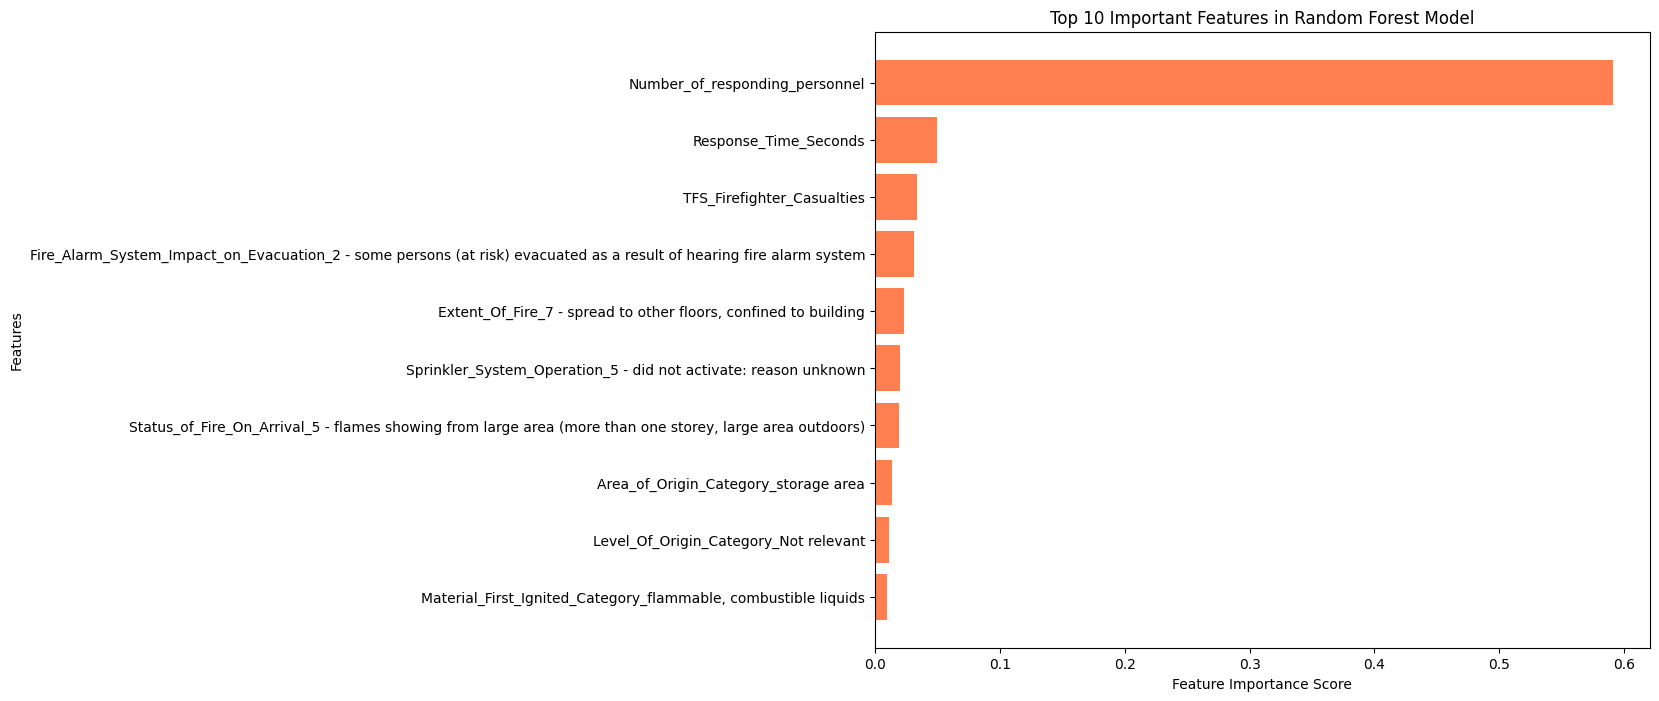

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1] , color = 'coral')
#change color of the chart

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest Model")
plt.show()

In [ ]:
# Group by 'Incident_Category' and calculate mean and median for 'Estimated_Dollar_Loss'
summary_stats = data.groupby('Incident_Category')['Estimated_Dollar_Loss'].agg(['mean', 'median']).reset_index()

# Rename columns for clarity
summary_stats.columns = ['Incident_Category', 'Mean_Estimated_Dollar_Loss', 'Median_Estimated_Dollar_Loss']

# Display the results
summary_stats


,Incident_Category,Mean_Estimated_Dollar_Loss,Median_Estimated_Dollar_Loss
0,Business,59402.876833,5000.0
1,Hazardous Materials/Gas,18861.904762,2500.0
2,Industrial,13412.333333,1000.0
3,Institution/School,31472.200000,1000.0
4,Other,33751.152607,2000.0
5,Public Assistance/Non-Fire,8043.181818,500.0
6,Residential,47264.385254,5000.0
7,Vehicle,22061.716516,10000.0


In [ ]:
#Run the random forest for each type of category - using best parameters from RF on whole table

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Initialize a list to store the results
results = []

# Loop through each unique Incident_Category
for category in data['Incident_Category'].unique():
    # Filter the dataset for the current category
    category_data = data[data['Incident_Category'] == category]

    # Separate target variable and features
    X = category_data.drop(columns=['Estimated_Dollar_Loss', 'Incident_Category'])  # Drop the target and category columns
    y = category_data['Estimated_Dollar_Loss']

    # Dummify categorical columns
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(random_state=42)

    # Define parameter grid
    param_grid = {
        'n_estimators': [65],
        'max_depth': [7],
        'min_samples_split': [5],
        'min_samples_leaf': [2]
    }

    # Perform GridSearch with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Compute cross-validation RMSE
    best_cv_mse = -grid_search.best_score_
    best_cv_rmse = np.sqrt(best_cv_mse)

    # Calculate range and mean of Estimated_Dollar_Loss for the current category
    loss_range = y.max() - y.min()  # Range of Estimated_Dollar_Loss
    loss_mean = y.mean()           # Mean of Estimated_Dollar_Loss

    # Normalize CV RMSE by the range and mean
    normalized_rmse_range = best_cv_rmse / loss_range if loss_range != 0 else np.nan
    normalized_rmse_mean = best_cv_rmse / loss_mean if loss_mean != 0 else np.nan

    # Use the best model to predict on the test set
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)

    # Calculate MSE and RMSE for the test set
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append the results
    results.append({
        'Incident_Category': category,
        'Test_Set_MSE': mse,
        'CV_RMSE': best_cv_rmse,
        'Normalized_CV_RMSE_Range': normalized_rmse_range,
        'Normalized_CV_RMSE_Mean': normalized_rmse_mean
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,Incident_Category,Test_Set_MSE,CV_RMSE,Normalized_CV_RMSE_Range,Normalized_CV_RMSE_Mean
0,Vehicle,6.549617e+09,52314.667927,0.017438,2.371287
1,Other,1.801899e+10,142273.029521,0.023712,4.215353
2,Residential,2.886171e+10,95453.685225,0.027272,2.019569
3,Business,9.718094e+10,197222.700431,0.039445,3.320087
4,Public Assistance/Non-Fire,8.838654e+08,25150.540280,0.125753,3.126939
5,Industrial,1.064393e+09,45597.027063,0.151990,3.399634
6,Institution/School,1.612997e+11,20230.729488,0.008092,0.642813
7,Hazardous Materials/Gas,1.265619e+10,6502.454356,0.021675,0.344740


In [ ]:
#Print results_df as a pretty table
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='psql'))

+----+----------------------------+----------------+-----------+----------------------------+---------------------------+
|    | Incident_Category          |   Test_Set_MSE |   CV_RMSE |   Normalized_CV_RMSE_Range |   Normalized_CV_RMSE_Mean |
|----+----------------------------+----------------+-----------+----------------------------+---------------------------|
|  0 | Vehicle                    |    6.54962e+09 |  52314.7  |                 0.0174382  |                  2.37129  |
|  1 | Other                      |    1.8019e+10  | 142273    |                 0.0237122  |                  4.21535  |
|  2 | Residential                |    2.88617e+10 |  95453.7  |                 0.0272725  |                  2.01957  |
|  3 | Business                   |    9.71809e+10 | 197223    |                 0.0394445  |                  3.32009  |
|  4 | Public Assistance/Non-Fire |    8.83865e+08 |  25150.5  |                 0.125753   |                  3.12694  |
|  5 | Industrial       

## Running Random Forest using only the top 10 features

In [ ]:
top_10_features = feature_importance_df['Feature'][:10][::-1]
#Make this to a list
top_10_features = top_10_features.tolist()
top_10_features

['Status_of_Fire_On_Arrival_3 - fire with smoke showing only - including vehicle, outdoor fires',
 'Possible_Cause_Category_undetermined',
 'Smoke_Spread_8 - entire structure',
 'Level_Of_Origin_Category_Not relevant',
 'Sprinkler_System_Operation_8 - not applicable - no sprinkler system present',
 'Status_of_Fire_On_Arrival_5 - flames showing from large area (more than one storey, large area outdoors)',
 'Extent_Of_Fire_7 - spread to other floors, confined to building',
 'TFS_Firefighter_Casualties',
 'Response_Time_Seconds',
 'Number_of_responding_personnel']

In [ ]:

# Subset the training and testing data to include only the top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define parameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [65, 100, 200],  # Number of trees in the forest
    'max_depth': [7, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Minimum samples required to be at a leaf node
}


# Perform GridSearch with cross-validation using only the top 10 features
grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_root_mean_squared_error')

# Fit grid search to the data
grid_search.fit(X_train_top10, y_train)

best_params = grid_search.best_params_
best_cv_rmse = np.sqrt(-grid_search.best_score_)

# Get the best model from GridSearch
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test = best_rf_model.predict(X_test_top10)

# Calculate Test Set MSE
mse = mean_squared_error(y_test, y_pred_test)

# Calculate Normalized CV RMSE
# Here, we normalize the RMSE by the range of the target variable in the test set
normalized_rmse_range = best_cv_rmse / (y_test.max() - y_test.min())

# Calculate Normalized CV RMSE Mean
normalized_rmse_mean = best_cv_rmse / np.mean(y_test)

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation RMSE:", best_cv_rmse)
print("Test Set MSE:", mse)
print("Normalized CV RMSE Range:", normalized_rmse_range)
print("Normalized CV RMSE Mean:", normalized_rmse_mean)

# Store results in a dictionary
results_top_10 = {
    'Test_Set_MSE': mse,
    'CV_RMSE': best_cv_rmse,
    'Normalized_CV_RMSE_Range': normalized_rmse_range,
    'Normalized_CV_RMSE_Mean': normalized_rmse_mean
}

results_top_10


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 65}
Best Cross-Validation RMSE: 350.30815311863785
Test Set MSE: 22834136225.355957
Normalized CV RMSE Range: 5.8384692186439644e-05
Normalized CV RMSE Mean: 0.009735106343137477


{'Test_Set_MSE': 22834136225.355957,
 'CV_RMSE': 350.30815311863785,
 'Normalized_CV_RMSE_Range': 5.8384692186439644e-05,
 'Normalized_CV_RMSE_Mean': 0.009735106343137477}

In [ ]:
rmse = np.sqrt(mse)

print("Test Set RMSE:", rmse)

Test Set RMSE: 151109.68276505632


In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): 7.483121994818544e+18


# 3. Gradient Boosting Regressor for Predicting 'Estimated_Dollar_Loss'


In [ ]:

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [75, 100, 200],
    'max_depth': [20, 35, 55],
    # 'learning_rate': [0.01, 0.1, 0.2],  # Uncomment if you decide to tune this parameter
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7]
}

# Perform GridSearch with cross-validation using only the top 10 features
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Utilize all available cores for faster computation
    verbose=2    # Optional: Set to 1 or 2 to get progress messages
)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve and display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Compute and display the best cross-validation RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best Cross-Validation RMSE (GridSearchCV):", best_rmse)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 75}
Best Cross-Validation RMSE (GridSearchCV): 129071.9669268928
Feature Importances:
                                              Feature  Importance
0                      Number_of_responding_personnel    0.473170
1                               Response_Time_Seconds    0.107607
5                          Sprinkler_System_Operation    0.065106
2                                      Extent_Of_Fire    0.053181
3                           Status_of_Fire_On_Arrival    0.032194
6                                        Smoke_Spread    0.027861
4                          TFS_Firefighter_Casualties    0.023460
7                             Area_of_Origin_Category    0.019778
10                            Possible_Cause_Category    0.019174
8                          Smoke_Alarm_at_Fire_Origin    0.017202
9                     Material_First_Ignited_Category    0.016798
21                      

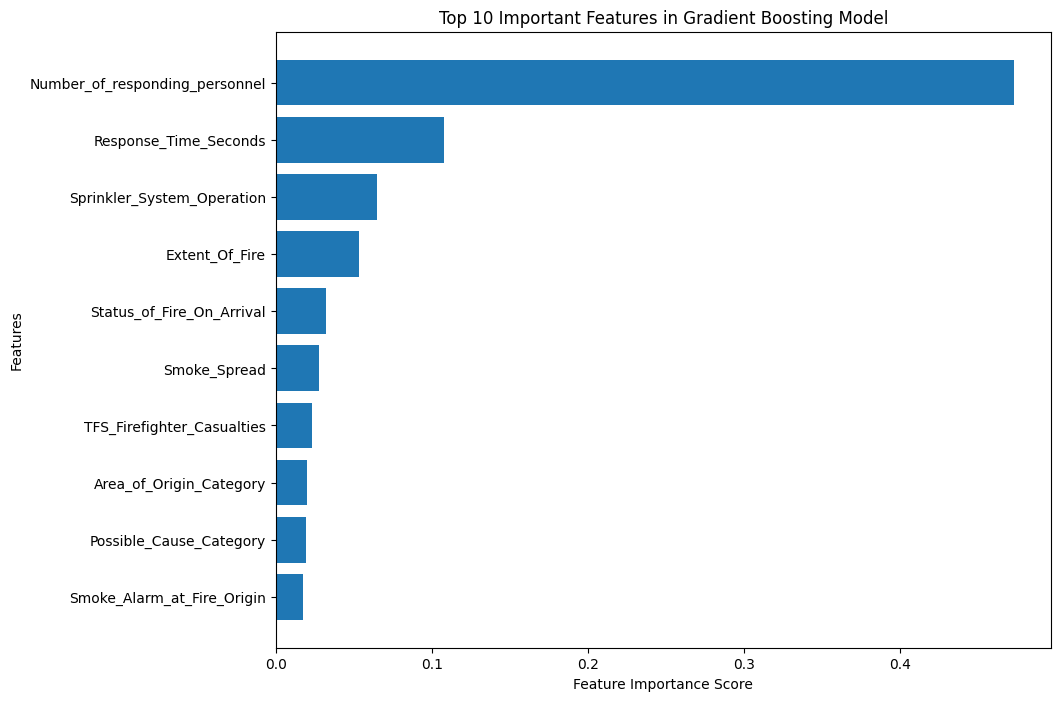

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Gradient Boosting Model")
plt.show()

## Running Grandient Boosting using only the top 10 features

In [ ]:
top_10_features = [
    'Number_of_responding_personnel',
    'Response_Time_Seconds',
    'Sprinkler_System_Operation',
    'Extent_Of_Fire',
    'Status_of_Fire_On_Arrival',
    'Smoke_Spread',
    'TFS_Firefighter_Casualties',
    'Area_of_Origin_Category',
    'Possible_Cause_Category',
    'Smoke_Alarm_at_Fire_Origin'
]

# Subset the training and testing data to include only the top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40],
    'max_depth': [3, 7, 10, 15],
    # 'learning_rate': [0.01, 0.1, 0.2],  # Uncomment if you decide to tune this parameter
    'min_samples_split': [1, 3, 5, 10, 15],
    'min_samples_leaf': [3, 5, 7]
}

# Perform GridSearch with cross-validation using only the top 10 features
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Utilize all available cores for faster computation
    verbose=2    # Optional: Set to 1 or 2 to get progress messages
)

# Fit the model
grid_search.fit(X_train_top10, y_train)

# Retrieve and display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Compute and display the best cross-validation RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best Cross-Validation RMSE (GridSearchCV):", best_rmse)

KeyError: "['Sprinkler_System_Operation', 'Extent_Of_Fire', 'Status_of_Fire_On_Arrival', 'Smoke_Spread', 'Area_of_Origin_Category', 'Possible_Cause_Category', 'Smoke_Alarm_at_Fire_Origin'] not in index"

# Top 10 of X

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
data = pd.read_csv('/df_imputed_final_final.csv')


top_10_rf_features = [
    'Number_of_responding_personnel', 'Response_Time_Seconds',
    'Extent_Of_Fire', 'Status_of_Fire_On_Arrival',
    'TFS_Firefighter_Casualties', 'Sprinkler_System_Operation',
    'Smoke_Spread', 'Area_of_Origin_Category',
    'Smoke_Alarm_at_Fire_Origin', 'Material_First_Ignited_Category'
]


top_10_gb_features = [
    'Number_of_responding_personnel',
    'Response_Time_Seconds',
    'Sprinkler_System_Operation',
    'Extent_Of_Fire',
    'Status_of_Fire_On_Arrival',
    'Smoke_Spread',
    'TFS_Firefighter_Casualties',
    'Area_of_Origin_Category',
    'Possible_Cause_Category',
    'Smoke_Alarm_at_Fire_Origin'
]

In [ ]:
# for rf
X_rf = data[top_10_rf_features]
y_rf = data['Estimated_Dollar_Loss']

In [ ]:
# Dummify categorical columns using pd.get_dummies
X_dummified_rf = pd.get_dummies(X_rf, drop_first=True)

# Split data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_dummified_rf, y_rf, test_size=0.3, random_state=42)

In [ ]:
X_train_rf.shape

(16548, 66)

In [ ]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define parameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [65, 100, 200],  # Number of trees in the forest
    'max_depth': [7, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Minimum samples required to be at a leaf node
}


# Perform GridSearch with cross-validation using only the top 10 features
grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_root_mean_squared_error')

# Fit grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

best_params = grid_search.best_params_
best_cv_rmse = np.sqrt(-grid_search.best_score_)

# Get the best model from GridSearch
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_test_rf = best_rf_model.predict(X_test_rf)

# Calculate Test Set MSE
mse = mean_squared_error(y_test_rf, y_pred_test_rf)

# Calculate Normalized CV RMSE
# Here, we normalize the RMSE by the range of the target variable in the test set
normalized_rmse_range = best_cv_rmse / (y_test_rf.max() - y_test_rf.min())

# Calculate Normalized CV RMSE Mean
normalized_rmse_mean = best_cv_rmse / np.mean(y_test_rf)

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation RMSE:", best_cv_rmse)
print("Test Set MSE:", mse)
print("Normalized CV RMSE Range:", normalized_rmse_range)
print("Normalized CV RMSE Mean:", normalized_rmse_mean)

# Store results in a dictionary
results_top_10 = {
    'Test_Set_MSE': mse,
    'CV_RMSE': best_cv_rmse,
    'Normalized_CV_RMSE_Range': normalized_rmse_range,
    'Normalized_CV_RMSE_Mean': normalized_rmse_mean
}

results_top_10


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation RMSE: 348.88582914943515
Test Set MSE: 20943927560.598503
Normalized CV RMSE Range: 5.814763819157252e-05
Normalized CV RMSE Mean: 0.009695579786386478


{'Test_Set_MSE': 20943927560.598503,
 'CV_RMSE': 348.88582914943515,
 'Normalized_CV_RMSE_Range': 5.814763819157252e-05,
 'Normalized_CV_RMSE_Mean': 0.009695579786386478}

In [ ]:
rmse = np.sqrt(mse)

print("Test Set RMSE:", rmse)

Test Set RMSE: 144720.16984718648


## Gradient Boosting

In [ ]:
data = pd.read_csv('/df_imputed_final_final.csv')

X = data[top_10_gb_features]
y = data['Estimated_Dollar_Loss']


In [ ]:
# Dummify categorical columns using pd.get_dummies
X_dummified = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_dummified, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40],
    'max_depth': [3, 7, 10, 15],
    # 'learning_rate': [0.01, 0.1, 0.2],  # Uncomment if you decide to tune this parameter
    'min_samples_split': [1, 3, 5, 10, 15],
    'min_samples_leaf': [3, 5, 7]
}

# Perform GridSearch with cross-validation using only the top 10 features
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Utilize all available cores for faster computation
    verbose=2    # Optional: Set to 1 or 2 to get progress messages
)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve and display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Compute and display the best cross-validation RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best Cross-Validation RMSE (GridSearchCV):", best_rmse)